<a href="https://colab.research.google.com/github/RaneemQaddoura/NPIR/blob/master/example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Nearest Point with Indexing Ratio (NPIR)</h1>
An efficient clustering algorithm based on the k-nearest neighbors with an indexing ratio

Nearest Point with Indexing Ratio (NPIR) is a clustering algorithm which explores the characteristics of the data points to group similar data points into the same clusters and dissimilar data points into different clusters. It is based on the nearest neighbor search technique in finding a k-nearest neighbor to a certain point. The algorithm iterates to assign data points to the most suitable clusters. It performs Election, Selection, and Assignment operations to assign data points to appropriate clusters.

<h2>Installation</h2>

Python 3.xx is required

<h2>GitHub</h2>

Clone the Git repository from GitHub:
git clone https://github.com/RaneemQaddoura/NPIR.git

In [ ]:
!git clone https://github.com/RaneemQaddoura/NPIR.git

In [ ]:
# Change working directory
import os
os.chdir("NPIR/")

In [ ]:
#Install NumPy, SciPy, sklearn, pandas, treelib, and matplotlib
!pip install -r requirements.txt

In [ ]:
from sklearn import metrics
from NPIR import NPIR
import numpy as np
import datetime
import warnings
import statistics as stat
import time
import csv
import plot_boxplot as box_plot
import plot_surface as surface
import plot_labels
from pathlib import Path
import pandas as pd
from IPython.display import Image
import ipywidgets as widgets
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#directories and flags
datasets_directory = "datasets/"
results_directory = time.strftime("%Y-%m-%d-%H-%M-%S") + '/'
Path(results_directory).mkdir(parents=True, exist_ok=True)
Flag_avg=False
Flag_best=False
Flag_details=False
Flag_details_Labels=False

In [ ]:
# Select data sets
#"aggregation","aniso","appendicitis","blobs","circles","diagnosis_II","flame","glass","iris","iris2D","jain","liver","moons","mouse","pathbased","seeds","smiley","varied","vary-density","wdbc","wine"
filenames = ["vary-density","iris2D"]
#IR: The indexing ratio to be used for generating the maximum index
indexing_ratio = [0.1, 0.15]
#The number of iteration i
iterations = [30, 50]
#Choose whether to Export the results in different formats
export_flags = {'Export_avg':True, 'Export_best':True, 'Export_details':True, 
'Export_details_labels':True, 'Export_boxplot':True, 'Export_surface':True, 'Export_plot_labels':True}
#Select number of runs
NumOfRuns = 30

In [ ]:
for filename in filenames:
	for IR in indexing_ratio:
		for i in iterations:
		    HS = [0]*NumOfRuns
		    CS = [0]*NumOfRuns
		    VM = [0]*NumOfRuns
		    AMI = [0]*NumOfRuns
		    ARI = [0]*NumOfRuns
		    
		    print()
		    print("dataset," + filename)
		    print("IR," + str(IR))
		    print("i," + str(i))
		    print("run,homo,compl,vmeasure,AMI,ARI,time")
		    
		    for run in range(NumOfRuns):
		        
		        #Get current time (start time)
		        format = '%m/%d/%y %H:%M:%S'
		        tStart = datetime.datetime.now()
		        
		        data = np.genfromtxt(datasets_directory + filename + '.csv', delimiter=',')
		        points = data[:,:-1] #list of points
		        k = len(np.unique(data[:,-1]))#k: Number of clusters
		        labelsTrue = data[:,-1] #List of actual cluster of each points (last field)
		    
		        labelsPred = NPIR(points,k,IR,i)
		        
		        tEnd = datetime.datetime.now()
		        HS[run] = float("%0.2f"%metrics.homogeneity_score(labelsTrue,labelsPred))
		        CS[run] = float("%0.2f"%metrics.completeness_score(labelsTrue,labelsPred))
		        VM[run] = float("%0.2f"%metrics.v_measure_score(labelsTrue,labelsPred))
		        AMI[run] = float("%0.2f"%metrics.adjusted_mutual_info_score(labelsTrue,labelsPred))
		        ARI[run] = float("%0.2f"%metrics.adjusted_rand_score(labelsTrue,labelsPred))
		        print(str(run + 1) +"," + str(HS[run]) +"," +str(CS[run]) +"," +str(VM[run]) +"," +str(AMI[run]) +"," +str(ARI[run]) +"," +str(tEnd - tStart))

		        if(export_flags['Export_details_labels']==True):
		        	ExportToFileDetailsLabels=results_directory + "experiment_details_Labels.csv"
		        	with open(ExportToFileDetailsLabels, 'a',newline='\n') as out_details_labels:
		        		writer_details = csv.writer(out_details_labels,delimiter=',')
		        		if (Flag_details_Labels==False): # just one time to write the header of the CSV file
		        			header_details= np.concatenate([["Dataset", "IR","i"]])
		        			writer_details.writerow(header_details)
		        			Flag_details_Labels = True
		        		a=np.concatenate([[filename, IR, i], labelsPred])  
		        		writer_details.writerow(a)
		        	out_details_labels.close() 

		        if(export_flags['Export_details']==True):
		        	ExportToFileDetails=results_directory + "experiment_details.csv"
		        	with open(ExportToFileDetails, 'a',newline='\n') as out_details:
		        		writer_details = csv.writer(out_details,delimiter=',')
		        		if (Flag_details==False): # just one time to write the header of the CSV file
		        			header_details= np.array(["Dataset", "IR","i","HS","CS","VM","AMI","ARI"])
		        			writer_details.writerow(header_details)
		        			Flag_details = True
		        		a=np.array([filename, IR, i, float("%0.2f"%(HS[run])), 
		        			float("%0.2f"%(CS[run])),  float("%0.2f"%(VM[run])),  float("%0.2f"%(AMI[run])),  
		        			float("%0.2f"%(ARI[run]))])
		        		writer_details.writerow(a)
		        	out_details.close()

		    if(export_flags['Export_avg']==True):
		    	export_to_file_avg=results_directory + "experiment_avg.csv"
		    	with open(export_to_file_avg, 'a',newline='\n') as out_avg:
		    		writer = csv.writer(out_avg,delimiter=',')
		    		if (Flag_avg==False): # just one time to write the header of the CSV file
			    		header= np.array(["Dataset", "IR","i", "HS","CS","VM","AMI","ARI"])
			    		writer.writerow(header)
			    		Flag_avg=True
			    	avgHS = str(float("%0.2f"%(sum(HS) / NumOfRuns)))
			    	avgCS = str(float("%0.2f"%(sum(CS) / NumOfRuns)))
			    	avgVM = str(float("%0.2f"%(sum(VM) / NumOfRuns)))
			    	avgAMI = str(float("%0.2f"%(sum(AMI) / NumOfRuns)))
			    	avgARI = str(float("%0.2f"%(sum(ARI) / NumOfRuns)))

			    	a=np.array([filename, IR, i, avgHS, avgCS, avgVM, avgAMI, avgARI])
			    	writer.writerow(a)
		    	out_avg.close()

		    if(export_flags['Export_avg']==True):
		    	export_to_file_best=results_directory + "experiment_best.csv"
		    	with open(export_to_file_best, 'a',newline='\n') as out_best:
		    		writer = csv.writer(out_best,delimiter=',')
		    		if (Flag_best==False): # just one time to write the header of the CSV file
			    		header= np.array(["Dataset", "IR","i", "HS","CS","VM","AMI","ARI"])
			    		writer.writerow(header)
			    		Flag_best=True
			    	bestHS = str(float("%0.2f"%(max(HS))))
			    	bestCS = str(float("%0.2f"%(max(CS))))
			    	bestVM = str(float("%0.2f"%(max(VM))))
			    	bestAMI = str(float("%0.2f"%(max(AMI))))
			    	bestARI = str(float("%0.2f"%(max(ARI))))

			    	a=np.array([filename, IR, i, bestHS, bestCS, bestVM, bestAMI, bestARI])
			    	writer.writerow(a)
		    	out_best.close()
		    print("AVG," + avgHS+"," + avgCS +","+ avgVM +"," +avgAMI +"," +avgARI)
		    print("Best," + bestHS+"," + bestCS +","+ bestVM +"," + bestAMI +"," + bestARI) 
print()
print('Experiments completed!')

In [ ]:
#import some useful packages to view the results' files in colab
import pandas as pd
from IPython.display import Image
import os
import datetime
import ipywidgets as widgets

In [ ]:
#Select the experiments folder
foldernames = [filename for filename in os.listdir() if filename.startswith(str(datetime.datetime.now().year))]
drop_folder = widgets.Dropdown(options=foldernames, description='Select folder:')
drop_folder

In [ ]:
#Get the selected folder
results_directory = drop_folder.value

<h4>Average Results File</h4>

In [ ]:
#Show the average results file
filename = results_directory +'/experiment_avg.csv' 
df = pd.read_csv(filename)
df.head(4)

,Dataset,IR,i,HS,CS,VM,AMI,ARI
0,vary-density,0.10,30,0.83,0.92,0.86,0.86,0.82
1,vary-density,0.10,50,0.88,0.96,0.91,0.91,0.87
2,vary-density,0.15,30,0.91,0.94,0.92,0.92,0.90
3,vary-density,0.15,50,0.98,0.99,0.98,0.98,0.98


<h4>Best Results File</h4>

In [ ]:
#Show the best results file
filename = results_directory +'/experiment_best.csv' 
df = pd.read_csv(filename)
df.head(4)

,Dataset,IR,i,HS,CS,VM,AMI,ARI
0,vary-density,0.10,30,1.0,1.0,1.0,1.0,1.0
1,vary-density,0.10,50,1.0,1.0,1.0,1.0,1.0
2,vary-density,0.15,30,1.0,1.0,1.0,1.0,1.0
3,vary-density,0.15,50,1.0,1.0,1.0,1.0,1.0


<h4>Detailed Results File</h4>

In [ ]:
#Show the detailed results file
filename = results_directory +'/experiment_details.csv' 
df = pd.read_csv(filename)
df.head(12)

,Dataset,IR,i,HS,CS,VM,AMI,ARI
0,vary-density,0.1,30,1.00,1.00,1.00,1.00,1.00
1,vary-density,0.1,30,0.58,0.95,0.72,0.72,0.57
2,vary-density,0.1,30,1.00,1.00,1.00,1.00,1.00
3,vary-density,0.1,30,1.00,1.00,1.00,1.00,1.00
4,vary-density,0.1,30,0.64,0.79,0.71,0.70,0.57
5,vary-density,0.1,30,1.00,1.00,1.00,1.00,1.00
6,vary-density,0.1,30,0.58,0.87,0.70,0.69,0.53
7,vary-density,0.1,30,0.58,0.95,0.72,0.72,0.57
8,vary-density,0.1,30,0.85,0.86,0.85,0.85,0.83
9,vary-density,0.1,30,1.00,1.00,1.00,1.00,1.00


<h4>Labels Results File</h4>

In [ ]:
#Show the labels results file
filename = results_directory +'/experiment_details_Labels.csv' 
header_names=['Dataset','Optimizer','objfname'] + ['label' + str(i) for i in range(50)]
df = pd.read_csv(filename,names=header_names,dtype=object)[1:]
df.head(12)

,Dataset,Optimizer,objfname,label0,label1,label2,label3,label4,label5,label6,label7,label8,label9,label10,label11,label12,label13,label14,label15,label16,label17,label18,label19,label20,label21,label22,label23,label24,label25,label26,label27,label28,label29,label30,label31,label32,label33,label34,label35,label36,label37,label38,label39,label40,label41,label42,label43,label44,label45,label46,label47,label48,label49
1,vary-density,0.1,30,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,vary-density,0.1,30,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
3,vary-density,0.1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,vary-density,0.1,30,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,vary-density,0.1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,vary-density,0.1,30,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,vary-density,0.1,30,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
8,vary-density,0.1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,vary-density,0.1,30,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,vary-density,0.1,30,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
#Draw boxplot
if export_flags['Export_boxplot'] == True:
  ev_measures=['HS', 'CS', 'VM', 'AMI', 'ARI']
  box_plot.run(results_directory, indexing_ratio, iterations, filenames, ev_measures)

In [ ]:
#Draw surface
if export_flags['Export_surface'] == True:
  ev_measures=['HS', 'CS', 'VM', 'AMI', 'ARI']
  surface.run(results_directory, indexing_ratio, iterations, filenames, ev_measures)

In [ ]:
#Draw labels plot
if export_flags['Export_plot_labels'] == True:
  plot_labels.run(results_directory, filenames, ev_measures)

In [ ]:
#Select boxplot to show
filenames = [filename for filename in os.listdir(results_directory) if filename.startswith('boxplot')]

drop_boxplot = widgets.Dropdown(options=filenames, description='Select plot:')
drop_boxplot

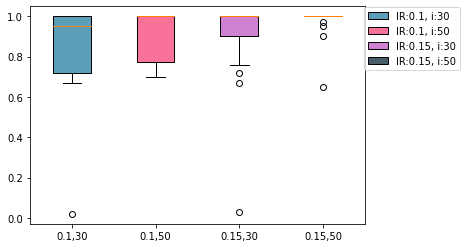

In [ ]:
#Show selected boxplot
Image(results_directory +'/' + drop_boxplot.value)

In [ ]:
#Select surface to show
filenames = [filename for filename in os.listdir(results_directory) if filename.startswith('surface')]

drop_surface = widgets.Dropdown(options=filenames, description='Select plot:')
drop_surface

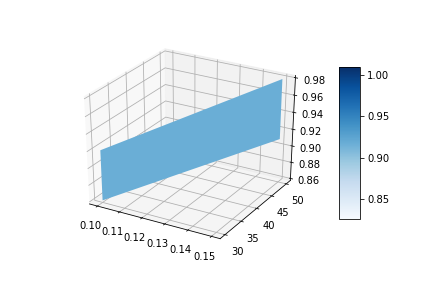

In [ ]:
#Show selected boxplot
Image(results_directory +'/' + drop_surface.value)

In [ ]:
#Select boxplot to show
filenames = [filename for filename in os.listdir(results_directory) if filename.startswith('plot')]

drop_plot_label = widgets.Dropdown(options=filenames, description='Select plot:')
drop_plot_label

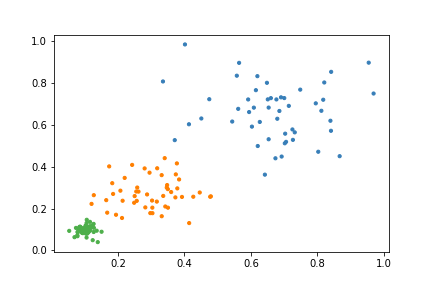

In [ ]:
#Show selected boxplot
Image(results_directory +'/' + drop_plot_label.value)

<h2>Citation Request</h2>

Qaddoura, R., Faris, H., & Aljarah, I. (2019). An efficient clustering algorithm based on the k-nearest neighbors with an indexing ratio. International Journal of Machine Learning and Cybernetics, 1-40.